# car detection - simple version
- Using hand crafted methods with Open cv tools
- 2025-03-12

In [1]:
!pip install -q opencv-python
!pip install -q numpy
!pip install -q matplotlib

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# Load the image using OpenCV
# img = cv2.imread("https://github.com/SwetaAIS2024/ISY5004_ITSS_practice/blob/main/Intelligent_Sensing_Systems_revision.png?raw=true")

# This wont work as cv2.imread() does not support URLs
# We will use requests library to download the image and then read it using cv2.imdecode()

In [4]:
import requests
from io import BytesIO

# URL of the image
image_url = "https://github.com/SwetaAIS2024/ISY5004_ITSS_practice/blob/main/Intelligent_Sensing_Systems_revision.png?raw=true"

# Download the image
response = requests.get(image_url)
img_data = BytesIO(response.content)

# Read the image using OpenCV
img = cv2.imdecode(np.frombuffer(img_data.read(), np.uint8), cv2.IMREAD_COLOR)


In [5]:
# Check if the image is loaded correctly
if img is None:
    print("Error: Could not load image.")
else:
    print("Image loaded successfully.")

Image loaded successfully.


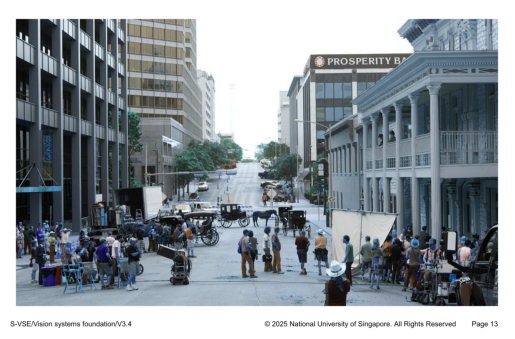

In [6]:
#Display the grayscale image 
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
# Resize the image and convert to grayscale
img_rs = cv2.resize(img, (800, 600))
img_gs = cv2.cvtColor(img_rs, cv2.COLOR_BGR2GRAY)

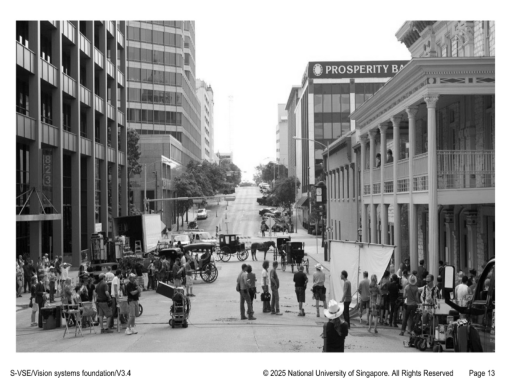

In [8]:
#Display the grayscale image 
plt.imshow(img_gs, cmap='gray')
plt.axis('off')
plt.show()

In [29]:
# We will do edge detection on this grayscale image using Canny edge detection
# Before that we will reduce the noise by using GaussionBlur 
img_gb = cv2.GaussianBlur(img_gs, (15, 15), 0) # kernel size should be odd number, i had tried with 10,10 
# but not working , but 5,5 , 15,15 are working.
img_cny = cv2.Canny(img_gb, 50, 150) #50 and 150 are the lower and the upper threshold 
# (Hysteresis thresholding) for the edge detection

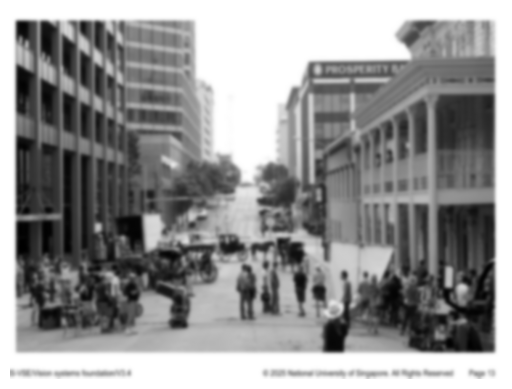

In [30]:
#Display the grayscale image 
plt.imshow(img_gb, cmap='gray')
plt.axis('off')
plt.show()

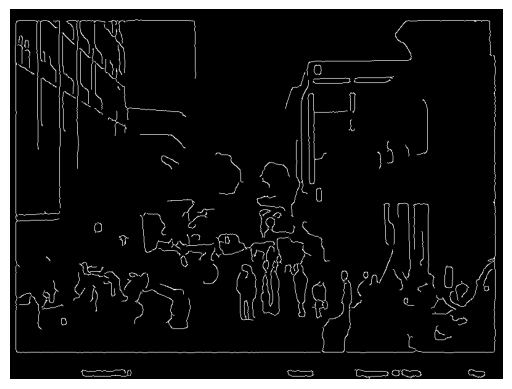

In [31]:
#Display the grayscale image 
plt.imshow(img_cny, cmap='gray')
plt.axis('off')
plt.show()

In [32]:
# Now we will do shape detection using Contours and Contours filtering based on the 
# aspect ration of the detected shapes 
contours, _ = cv2.findContours(img_cny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [33]:
# copy of orig image 
car_detection_img = img_rs.copy()

In [34]:
# Define possible car aspect ratio range (width/height)
for cnt in contours:
               x, y, w, h = cv2.boundingRect(cnt)
               aspect_ratio = w / float(h)

               # Filter based on reasonable car aspect ratio and size
               if 1.2 < aspect_ratio < 4.0 and 40 < w < 200 and 20 < h < 100:
                              cv2.rectangle(car_detection_img, (x, y), (x + w, y + h), (0, 255, 0), 2)



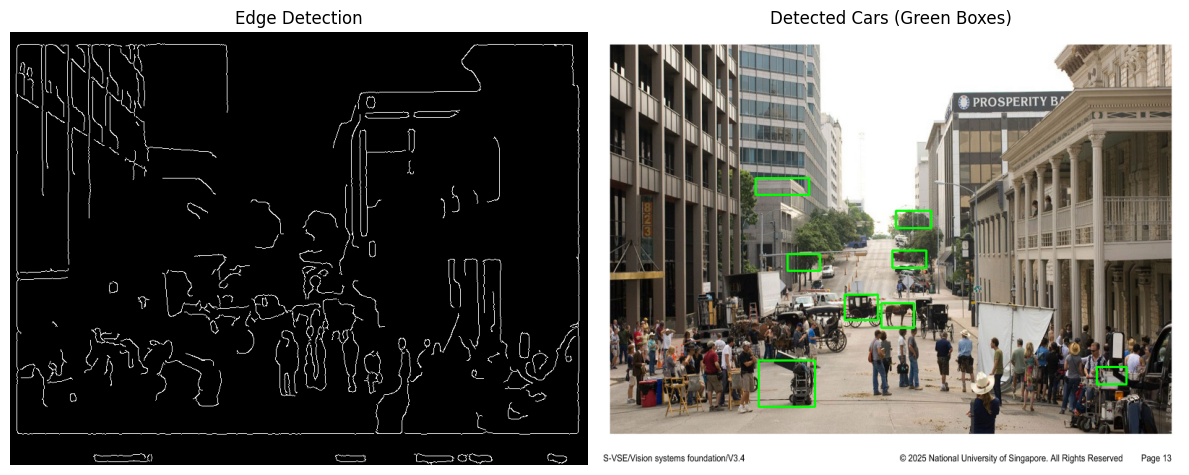

In [35]:
# Display results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img_cny, cmap="gray")
axs[0].set_title("Edge Detection")
axs[0].axis("off")

axs[1].imshow(cv2.cvtColor(car_detection_img, cv2.COLOR_BGR2RGB))
axs[1].set_title("Detected Cars (Green Boxes)")
axs[1].axis("off")

plt.tight_layout()
plt.show()